In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve


 Cargamos los datos en dataframes

In [343]:
#Leemos el archivo .xlxs
df2=pd.read_excel('E-Commerce_train.xlsx')
df2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [222]:
test=pd.read_excel('E-Commerce_test.xlsx')


In [223]:
test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


Tenemos un dataframe de 8999 filas y 12 campos, nuestro campo "target" será Reached on Time

In [367]:
#Creamos una copia del dataframe original
df=df2.copy()

Quitamos la columna ID, Gender e instanciamos la columna "target" para y.

In [368]:
X=df
X.rename({'Reached.on.Time_Y.N':'target'}, axis=1, inplace=True)
y=X['target']
X=df.drop(columns=['ID','Gender','target'])
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,44,1233
1,F,Flight,4,5,216,2,low,59,3088
2,A,Flight,2,2,183,4,low,48,3374
3,B,Flight,3,3,176,4,medium,10,1177
4,C,Flight,2,2,184,3,medium,46,2484
...,...,...,...,...,...,...,...,...,...
8994,D,Ship,3,1,217,3,low,1,4177
8995,F,Ship,5,3,232,3,medium,3,4526
8996,A,Ship,4,5,260,3,medium,6,4221
8997,B,Ship,4,2,184,3,medium,5,5931


Analizando el dataframe, tenemos cuatro campos con valores tipo str que habrá que codificar para poder procesarlos.

In [351]:
print(df.Warehouse_block.unique(), 
df.Mode_of_Shipment.unique(), 
df.Product_importance.unique(), )
#df.Gender.unique())

['D' 'F' 'A' 'B' 'C'] ['Flight' 'Ship' 'Road'] ['low' 'medium' 'high']


Procesamos estos campos con LaberEncoder para obtener un dataframe codificado

In [297]:
# Primero para Gender F=0 M=1
#df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [369]:
from sklearn.preprocessing import LabelEncoder

#Shipment (Flight=0, road=1 o ship=2)

Shipment=X['Mode_of_Shipment'].values
enc=LabelEncoder().fit(Shipment)

Shipment=enc.transform(Shipment)
Shipment=pd.DataFrame(Shipment)

X.drop(columns="Mode_of_Shipment", inplace=True)
X.insert(1,'Mode_of_Shipment', Shipment)

In [370]:
#Warehouse_block (D=3,F=4,A=0,B=1,C=2)

Warehouse_block=X['Warehouse_block'].values
enc=LabelEncoder().fit(Warehouse_block)

Warehouse_block=enc.transform(Warehouse_block)
Warehouse_block=pd.DataFrame(Warehouse_block)

X.drop(columns="Warehouse_block", inplace=True)
X.insert(0,'Warehouse_block', Warehouse_block)


In [371]:
#Product_importance (low=1, medium=2, high=0)

Product_importance=X['Product_importance'].values
enc=LabelEncoder().fit(Product_importance)

Product_importance=enc.transform(Product_importance)
Product_importance=pd.DataFrame(Product_importance)

X.drop(columns="Product_importance", inplace=True)
X.insert(6,'Product_importance', Product_importance)
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,44,1233
1,4,0,4,5,216,2,1,59,3088
2,0,0,2,2,183,4,1,48,3374
3,1,0,3,3,176,4,2,10,1177
4,2,0,2,2,184,3,2,46,2484
...,...,...,...,...,...,...,...,...,...
8994,3,2,3,1,217,3,1,1,4177
8995,4,2,5,3,232,3,2,3,4526
8996,0,2,4,5,260,3,2,6,4221
8997,1,2,4,2,184,3,2,5,5931


Revisamos el balanceo de la variable de salida

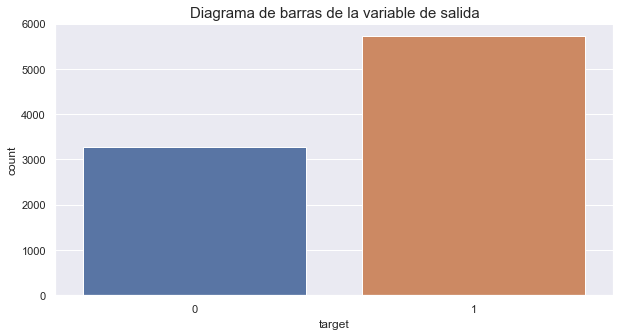

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'target' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

### Escalamos (Estandarizamos y luego normalizamos).

In [372]:
columnas_testeo = ['Cost_of_the_Product','Discount_offered', 'Weight_in_gms']
X_ajustar = X[columnas_testeo]
#X=df.drop(['target'], axis=1)
#y = df.target

In [287]:
# Estandarizamos con StandardScaler
# scaler=StandardScaler()
# X_scaled=scaler.fit_transform(X)

In [373]:

# Normalizamos con MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_ajustar) # Scale the features

In [374]:
X_scaled=pd.DataFrame(X_scaled)

In [375]:
X_scaled.rename({0:'Cost_of_the_Product',1:'Discount_offered',2:'Weight_in_gms'}, axis=1, inplace=True)

In [376]:
X_scaled

,Cost_of_the_Product,Discount_offered,Weight_in_gms
0,0.378505,0.671875,0.033893
1,0.560748,0.906250,0.304894
2,0.406542,0.734375,0.346676
3,0.373832,0.140625,0.025712
4,0.411215,0.703125,0.216654
...,...,...,...
8994,0.565421,0.000000,0.463988
8995,0.635514,0.031250,0.514974
8996,0.766355,0.078125,0.470416
8997,0.411215,0.062500,0.720234


In [377]:
X1=X_scaled
X2=X.drop(columns=['Cost_of_the_Product','Discount_offered', 'Weight_in_gms'])
X=pd.concat([X1,X2],axis=1)

In [378]:
X

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance
0,0.378505,0.671875,0.033893,3,0,4,2,3,1
1,0.560748,0.906250,0.304894,4,0,4,5,2,1
2,0.406542,0.734375,0.346676,0,0,2,2,4,1
3,0.373832,0.140625,0.025712,1,0,3,3,4,2
4,0.411215,0.703125,0.216654,2,0,2,2,3,2
...,...,...,...,...,...,...,...,...,...
8994,0.565421,0.000000,0.463988,3,2,3,1,3,1
8995,0.635514,0.031250,0.514974,4,2,5,3,3,2
8996,0.766355,0.078125,0.470416,0,2,4,5,3,2
8997,0.411215,0.062500,0.720234,1,2,4,2,3,2


### Selección de los tres campos que más contribuyen a la salida objetivo con la libreria SelectKBest.

In [121]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [122]:
best_features=SelectKBest(score_func=chi2, k=3)
fit=best_features.fit(X_scaled,y)

In [123]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X_scaled.columns)

In [124]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
1,Mode_of_Shipment,0.001452
0,Warehouse_block,0.020002
7,Gender,0.037679
6,Product_importance,0.200663
3,Customer_rating,0.274706
5,Prior_purchases,4.069585
2,Customer_care_calls,6.048944
4,Cost_of_the_Product,6.068745
9,Weight_in_gms,141.764483
8,Discount_offered,523.420607


In [125]:
#Elegimos variables de entrenamiento (Elegimos dos con mayor peso) y separamos las etiquetas

columnas_entrenamiento = ['Weight_in_gms','Discount_offered']
X = X_scaled[columnas_entrenamiento]
y = df.target

### Vamos a balancear nuestro dataset con un sobremuestreo de la clase minoritaria, es decir de las veces que no se entregó el paquete, con el algoritmo SMOTE.
https://es.acervolima.com/ml-manejo-de-datos-desequilibrados-con-smote-y-algoritmo-near-miss-en-python/

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [100]:
'''
#Balanceamos con Undersampling

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2)
X_train_res, y_train_res= rus.fit_resample(X_train, y_train)
'''

In [332]:

#Esto es para over_sampling

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



After OverSampling, the shape of train_X: (8006, 10)
After OverSampling, the shape of train_y: (8006,) 

After OverSampling, counts of label '1': 4003
After OverSampling, counts of label '0': 4003


Creamos un nuevo dataframe con el sobremuestreo para poder hacer un heatmap.

In [79]:

y_train_res1= pd.DataFrame(y_train_res, columns=['target'])
df_sample=pd.concat([X_train_res,y_train_res1], axis=1)
df_sample

,Discount_offered,Weight_in_gms,target
0,-0.637832,0.505763,0
1,-0.752780,1.165964,0
2,-0.292986,1.260101,0
3,-0.637832,0.598042,0
4,-0.752780,0.960348,0
...,...,...,...
4587,1.201347,-1.494658,1
4588,1.028924,-0.452333,1
4589,0.051860,-0.774382,1
4590,-0.005614,-1.450686,1


Hacemos un pairplot y un heatmap para ver la correlación entre las variables

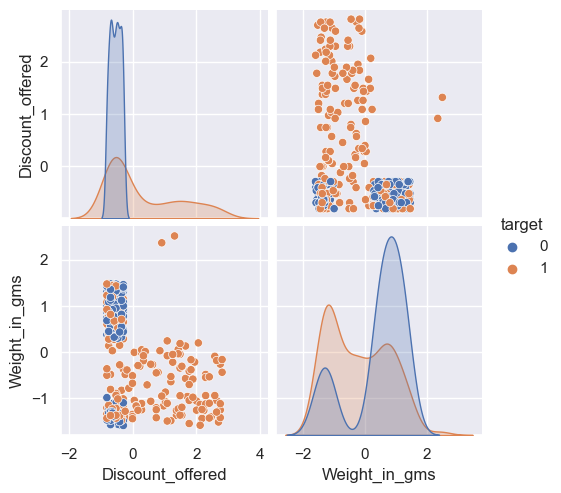

In [80]:
sns.pairplot(df_sample.sample(frac = 0.1), hue = 'target')
plt.show()

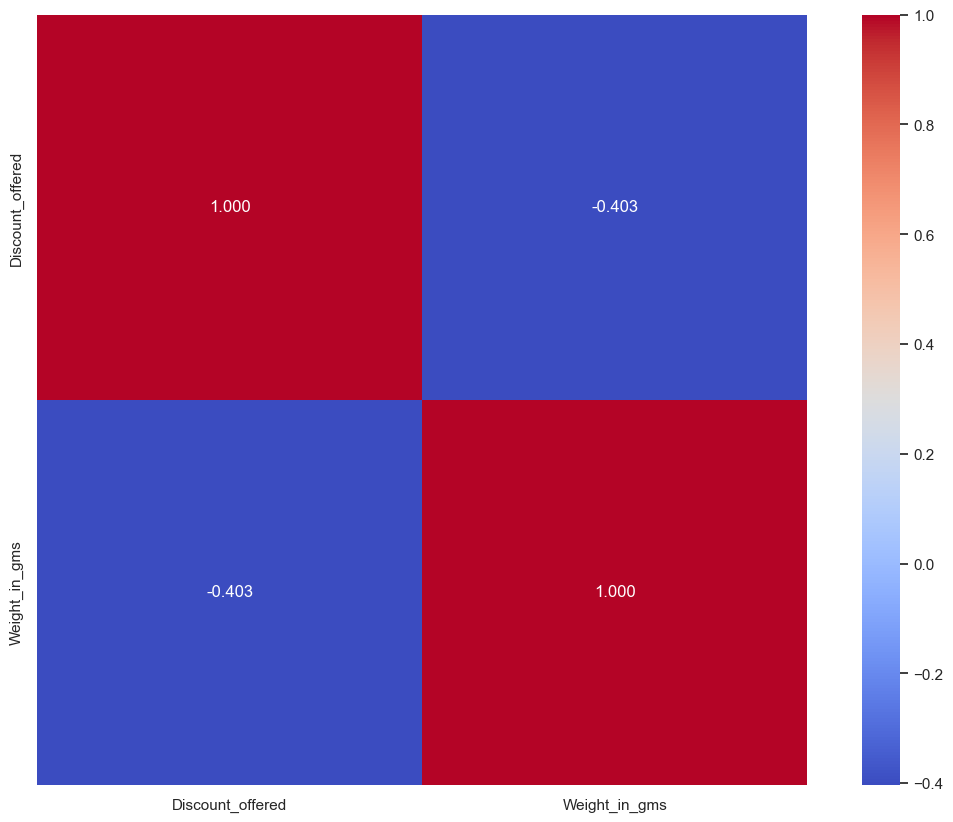

In [28]:
# Hacemos un mapa de calor

corr = df_sample.drop(columns = ['target']).corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 12},
           xticklabels= df_sample.drop(columns = ['target']).columns, 
           yticklabels= df_sample.drop(columns = ['target']).columns,
           cmap= 'coolwarm')

plt.show()

In [246]:
# Generamos un modelo que diga siempre que NO va a llegar el paquete y medimos su exactitud

y_pred = np.zeros(y_train_res1.shape)
accuracy_ceros = metrics.accuracy_score(y_train_res1,y_pred)
print(accuracy_ceros)

0.5


In [247]:
# Generamos otro modelo que diga siempre que SÍ va a llegar el paquete y medimos su exactitud

y_pred = np.ones(y_train_res1.shape)
accuracy_unos = metrics.accuracy_score(y_train_res1,y_pred)
print(accuracy_unos)

0.5


### `Probamos diferentes modelos`

**Vamos a entrenar distintos árboles y mostrarles distintas porciones del dataset**

In [217]:
lista_de_modelos = []
N_modelos = 20

for i in range(N_modelos):
    X_train_res_boostrap, _, y_train__res_boostrap, _ = train_test_split(X_train_res, y_train_res, test_size=0.5, stratify = y_train_res)
    clf = DecisionTreeClassifier(max_depth = 4) #Nivel del árbol
    clf.fit(X_train_res_boostrap, y_train__res_boostrap)
    lista_de_modelos.append(clf)

In [218]:
# Evaluamos cada modelo en hold-out

for idx, modelo in enumerate(lista_de_modelos):
    y_test_pred = modelo.predict(X_test)
    print('Accuracy Modelo ', idx, ' es ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Modelo  0  es  0.6707407407407407
Accuracy Modelo  1  es  0.6722222222222223
Accuracy Modelo  2  es  0.67
Accuracy Modelo  3  es  0.6707407407407407
Accuracy Modelo  4  es  0.6681481481481482
Accuracy Modelo  5  es  0.6722222222222223
Accuracy Modelo  6  es  0.6722222222222223
Accuracy Modelo  7  es  0.6703703703703704
Accuracy Modelo  8  es  0.6714814814814815
Accuracy Modelo  9  es  0.6703703703703704
Accuracy Modelo  10  es  0.6696296296296296
Accuracy Modelo  11  es  0.6711111111111111
Accuracy Modelo  12  es  0.6733333333333333
Accuracy Modelo  13  es  0.6707407407407407
Accuracy Modelo  14  es  0.6707407407407407
Accuracy Modelo  15  es  0.6696296296296296
Accuracy Modelo  16  es  0.67
Accuracy Modelo  17  es  0.6703703703703704
Accuracy Modelo  18  es  0.6703703703703704
Accuracy Modelo  19  es  0.672962962962963


**Evaluemos, ahora, el accuracy de todo el ensamble usando el conjunto de hold-out. Lo haremos con el promedio de las probabilidades que devuelve cada árbol. Si la probabilidad promedio es mayor a 0.5, clasificamos como positivo**.

In [219]:
probs_test_pred = np.ones(y_test.size)

In [220]:
# Recorremos la lista y predecimos las probabilidades

for modelo in lista_de_modelos:
    probs_test_pred_modelo = modelo.predict_proba(X_test)
    #print(probs_test_pred_modelo.shape)
    probs_test_pred +=probs_test_pred_modelo[:,1]

In [221]:
probs_test_pred = probs_test_pred/N_modelos

y_test_pred = probs_test_pred>0.5
y_test_pred = y_test_pred.astype(int)

print('Accuracy del ensamble: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy del ensamble:  0.6725925925925926


In [222]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_test_pred))
print('Recall: ',metrics.recall_score(y_test, y_test_pred, zero_division=1))
print('Precision: ',metrics.precision_score(y_test, y_test_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_test_pred, zero_division=1))

Accuracy:  0.6725925925925926
Recall:  0.48717948717948717
Precision:  0.9952380952380953
CL Report:               precision    recall  f1-score   support

           0       0.53      1.00      0.69       984
           1       1.00      0.49      0.65      1716

    accuracy                           0.67      2700
   macro avg       0.76      0.74      0.67      2700
weighted avg       0.82      0.67      0.67      2700



### `Usemos Bagging Classifier`

In [194]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators= 100, n_jobs = -1)
clf.fit(X_train_res, y_train_res)
y_train_pred = clf.predict(X_train_res)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train_res, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9737696727454409
0.6603703703703704


In [195]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_test_pred))
print('Recall: ',metrics.recall_score(y_test, y_test_pred, zero_division=1))
print('Precision: ',metrics.precision_score(y_test, y_test_pred, zero_division=1))

Accuracy:  0.6603703703703704
Recall:  0.655011655011655
Precision:  0.7757073844030365


### `Usemos Random Forest`

In [248]:
from sklearn.ensemble import RandomForestClassifier

# Instanciamos el modelo

clf = RandomForestClassifier(n_estimators=50, max_features="log2", n_jobs=-1, oob_score = True, random_state = 100)
clf.fit(X_train_res,y_train_res)

# Evaluamos

y_train_pred = clf.predict(X_train_res)
y_test_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_train_res, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))


1.0
0.695925925925926


In [249]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_test_pred))
print('Recall: ',metrics.recall_score(y_test, y_test_pred, zero_division=1))
print('Precision: ',metrics.precision_score(y_test, y_test_pred, zero_division=1))

Accuracy:  0.695925925925926
Recall:  0.6375291375291375
Precision:  0.8460943542150039


Utilizamos la optimización de hiperparámetros

In [153]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'random_state': 40}
Mejor Score: 0.7232104466543616



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.396756,0.260187,0.228059,0.009470,10,{'random_state': 10},0.700999,0.704560,0.708307,0.751405,0.749532,0.722961,0.022587,3
1,3.368759,0.228978,0.232051,0.020182,20,{'random_state': 20},0.699126,0.704560,0.708307,0.752030,0.749532,0.722711,0.023118,4
2,3.665227,0.515051,0.239864,0.071888,40,{'random_state': 40},0.700375,0.704560,0.708307,0.752030,0.750781,0.723210,0.023161,1
3,3.410172,0.742534,0.253853,0.065693,60,{'random_state': 60},0.697878,0.705809,0.708932,0.752030,0.750156,0.722961,0.023258,2
4,3.333651,0.472933,0.208653,0.032038,80,{'random_state': 80},0.699126,0.702686,0.707683,0.750781,0.750156,0.722086,0.023334,6
5,3.727051,0.265371,0.242062,0.020788,100,{'random_state': 100},0.699126,0.702686,0.707683,0.755153,0.747658,0.722461,0.023907,5


## `Construcción de Pipelines`

In [333]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import tree

In [334]:
# Creamos el primer pipeline con regresion logística
#('scl', StandardScaler()),
pipe_lr = Pipeline([
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

In [335]:
# Creamos el segundo pipeline con SVM (Support Vector Machine)

pipe_svm = Pipeline([
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])

In [336]:
# Creamos el tercer pipeline con tree classifier

pipe_dt = Pipeline([
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [337]:
# Creamos el cuarto pipeline con naive_bayes GassuanNB

pipe_Gau= Pipeline([
            ('pca', PCA(n_components=2)),
            ('clf', GaussianNB())])

In [338]:
# Los guardamos en una lista

pipelines = [pipe_lr, pipe_svm, pipe_dt,pipe_Gau]

In [339]:
# Hacemos un diccionario para fines organizativos

pipe_dict = {0: 'Regresión Logística', 1: 'SVM', 2: 'Árbol de decisión',3:'GaussianNB'}

In [340]:
# Entrenamos

for pipe in pipelines:
	pipe.fit(X_train_res, y_train_res)

In [341]:
# Evaluamos

for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Regresión Logística pipeline accuracy en test: 0.564
SVM pipeline accuracy en test: 0.587
Árbol de decisión pipeline accuracy en test: 0.739
GaussianNB pipeline accuracy en test: 0.584


In [342]:
# Identificamos el mejor modelo para el set de testeo

best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: Árbol de decisión


### `GaussianNB`

In [250]:
model=GaussianNB()


# Entrenamos
model.fit(X_train_res, y_train_res)
y_pred=model.predict(X_test)

In [251]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision: ',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.6548148148148148
Recall:  0.4586247086247086
Precision:  0.9962025316455696
CL Report:               precision    recall  f1-score   support

           0       0.51      1.00      0.68       984
           1       1.00      0.46      0.63      1716

    accuracy                           0.65      2700
   macro avg       0.75      0.73      0.65      2700
weighted avg       0.82      0.65      0.65      2700



### `Regresión logística`

In [252]:
logreg= LogisticRegression()
logreg.fit(X_train_res,y_train_res)

y_pred=logreg.predict(X_test)


#### Evaluamos el performance del modelo

In [253]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision: ',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.6614814814814814
Recall:  0.539044289044289
Precision:  0.8826335877862596
CL Report:               precision    recall  f1-score   support

           0       0.52      0.88      0.65       984
           1       0.88      0.54      0.67      1716

    accuracy                           0.66      2700
   macro avg       0.70      0.71      0.66      2700
weighted avg       0.75      0.66      0.66      2700



## `KNN Vecinos cercanos`

In [254]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=20, weights='distance') #wights = uniform, pero puede ser igual a 'distance' para agregar peso a los puntos mas cercanos.
clf.fit(X_train_res,y_train_res)
y_pred = clf.predict(X_test)

#### Evaluamos el performance del modelo

In [255]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision: ',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.6611111111111111
Recall:  0.5314685314685315
Precision:  0.8914956011730205
CL Report:               precision    recall  f1-score   support

           0       0.52      0.89      0.66       984
           1       0.89      0.53      0.67      1716

    accuracy                           0.66      2700
   macro avg       0.71      0.71      0.66      2700
weighted avg       0.76      0.66      0.66      2700



### `SVM`

In [256]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=100)
classifier.fit(X_train_res, y_train_res)
Y_Pred = classifier.predict(X_test)

In [257]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision: ',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.6611111111111111
Recall:  0.5314685314685315
Precision:  0.8914956011730205
CL Report:               precision    recall  f1-score   support

           0       0.52      0.89      0.66       984
           1       0.89      0.53      0.67      1716

    accuracy                           0.66      2700
   macro avg       0.71      0.71      0.66      2700
weighted avg       0.76      0.66      0.66      2700

